| ![logo](udinus.png)      |**LEMBAR SOAL UJIAN <br> FAKULTAS ILMU KOMPUTER <br> UNIVERSITAS DIAN NUSWANTORO SEMARANG <br>** JL. IMAM BONJOL NO. 207 SEMARANG TELP. 024-3575915, 024-3575916 |
| :---                     |    :----:   | 


|UJIAN TENGAH SEMESTER GASAL 2022/2023|
|:---:|


|Mata Kuliah: Analitika Media Sosial | Sifat: Take Home|
| :---                     |    ----:   |
|Hari / Tanggal: **01 November 2022**       | Waktu: **10.20 - 12.00** |
|Kelompok: A12.6501                 | Dosen: **Abu Salam, M.Kom**|




# Petunjuk Pengerjaan Soal:
- Panduan pengerjaan dalam bentuk gambar ada dibawah block ini
- Sudah disediakan tiap block untuk anda dilengkapi, silakan isi ditempat tersebut, jika block cell kurang, silakan tambahkan lagi **diperbolehkan memodifikasi atau menambahkan proses dari blok yang sudah ada**
- **TUJUAN: ANALISIS TAHAP PRE PROCESSING DAN BERAPA PERFORMA DARI SKEMA YANG DIBUAT DENGAN MENGGUNAKAN TARGET `EMOSI`**

FORMAT PENGIRIMAN SOAL (PILIH SALAH SATU)
- REPOSITORIKAN FILE IPYNB KE GITHUB & KIRIM URL GITHUB KE KULINO BLOK UTS
- FORMAT PENAMAN FILE: AMS_NIM (GANTI TANDA TITIK PADA NIM MENJADI `UNDERSCORE`)


SKEMA KLASIFIKASI
===
![klasifikasi](klasifikasi.png)

SKEMA PRE-PREPROCESSING DATA
===
![preprocessing](preprocessing.png)

## Nama : Nawang Pramesti Adji
## NIM    : A12.2020.06534


# Proses Pengambilan Data
# Load Library

Memanggil library yang akan digunakan

In [1]:
import pandas as pd
import time
import tweepy
import numpy as np

## Otentikasi dan Hak Akses

In [2]:
def twitter_config():
    """
    Fungsi utilitas untuk mengkonfigurasi konsumsi file API Twitter dengan␣
    ,!kunci yang disediakan.
    """
    
    # Autentikasi dan akses menggunakan keys
    auth = tweepy.OAuthHandler("3WqiERQiyIS4bDs98zeMewIPU", 
    "i9Q4rRSAU1Ths8EDxpdCYcekyoHk98UW8DUKaKBgSMtNqoEBCX")
    auth.set_access_token("1576906033913417728-peMb29THb8tPCWayV9UDpb9hHEj7gD", 
    "CkytzLI8Pympc2zAwvjTj2pLIjis5IAdq1ATgJEe9sh6B")
    
    # Kembalikan akses ke API
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    return api

In [3]:
# buat extractor object
extractor = twitter_config()

Authentication OK


## Ambil Tweet dari Username
username yang saya gunakan yaitu @FiersaBesari

In [4]:
tweets = extractor.user_timeline(screen_name="FiersaBesari", count=100)
print("Tweets terambil: {}.\n".format(len(tweets)))

print("5 tweet teratas:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Tweets terambil: 100.

5 tweet teratas:

@fannysoegi @naufalbahir Bukunya terlihat sudah beda lagi, padahal yang itu belum selesai 👋🏼

@hysndrf_irref @NajwaShihab Sudah. Menyenangkan sekali karya saya dibaca anak muda di sana 😊❤️

@dedekryy See you ❤️

Sampai jumpa, Kuala Lumpur ❤️ https://t.co/mAwzEzIHfv

Turut berduka cita yang terdalam atas tragedi yang terjadi di Itaewon #prayforitaewon 💔



## Memasukkan ke dataframe pandas

In [5]:
# Membuat kerangka data menggunakan sintaks berikut
dataset = pd.DataFrame(data = [tweet.text for tweet in tweets], columns = ['Tweets'])

# Tampilan kerangka data
display(dataset.head(10))

,Tweets
0,@fannysoegi @naufalbahir Bukunya terlihat suda...
1,@hysndrf_irref @NajwaShihab Sudah. Menyenangka...
2,@dedekryy See you ❤️
3,"Sampai jumpa, Kuala Lumpur ❤️ https://t.co/mAw..."
4,Turut berduka cita yang terdalam atas tragedi ...
5,"Sekarang, segini dulu. Biar masih banyak kuran..."
6,@Dzawinur Jadi lah featuring
7,Terima kasih karena telah berjuang sampai Sema...
8,@HeyBudie https://t.co/pOazsIDfLy
9,"Tuhan, mauku enggak banyak. Satu aja. Tapi sus..."


In [6]:
dataset.to_csv('dataset_FiersaBesari.csv')

## Menetukan sentimen pada tweet

In [7]:
import tweepy as tw
import re
import pandas as pd
from textblob import TextBlob

In [8]:
# Autentikasi dan akses menggunakan keys
auth = tweepy.OAuthHandler("3WqiERQiyIS4bDs98zeMewIPU","i9Q4rRSAU1Ths8EDxpdCYcekyoHk98UW8DUKaKBgSMtNqoEBCX")
auth.set_access_token("1576906033913417728-peMb29THb8tPCWayV9UDpb9hHEj7gD","CkytzLI8Pympc2zAwvjTj2pLIjis5IAdq1ATgJEe9sh6B")
api = tw.API(auth)
    
hasilsearch = api.search_tweets(q="FiersaBesari",lang="id",count=100) 

In [9]:
hasilanalisis =[]

for tweet in hasilsearch:
    tweet_properties = {}
    tweet_properties["tanggal_tweet"] = tweet.created_at
    tweet_properties["pengguna"] = tweet.user.screen_name
    tweet_properties["Tweet"] = tweet.text
    tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet.text).split())
    print(tweet_bersih)
    
    analysis = TextBlob(tweet_bersih)
    try:
        analysis = analysis.translate(to="en")
    except Exception as e:
        print(e)
    
    if analysis.sentiment.polarity > 0.0:
        tweet_properties["sentimen"] = "1"
    elif analysis.sentiment.polarity == 0.0:
        tweet_properties["sentimen"] = "0"
    else:
        tweet_properties["sentimen"] = "-1"
        
    if tweet.retweet_count > 0:
        if tweet_properties not in hasilanalisis:
            hasilanalisis.append(tweet_properties)
    else:
        hasilanalisis.append(tweet_properties)
        

RT Sampai jumpa Kuala Lumpur
'list' object has no attribute 'strip'
Terima kasih untuk malam galau Indonesia bersama Puas
'list' object has no attribute 'strip'
lovely Nangis ya sambil layan lagu Real nangis masa lagu Temaram Terima kasih untuk
'list' object has no attribute 'strip'
Tanda hadir FiersaBesariLiveinKL Semoga bisa kembali lagi kesini
'list' object has no attribute 'strip'
Weyh best gila Makasih bang
'list' object has no attribute 'strip'
Terima kasih FiersaBesariliveinKL
'list' object has no attribute 'strip'
RT Sampai jumpa Kuala Lumpur
'list' object has no attribute 'strip'
RT Aku hanya seorang pengecut sedang jatuh hati memberi perhatian tapi bukan kepastian Barusan waktu check sound menco
'list' object has no attribute 'strip'
apa yg saya punya sekarang itu yg saya pakai suporrt terus bang
'list' object has no attribute 'strip'
Jangan lupa saling tunjuk sana sini
'list' object has no attribute 'strip'
RT Tertawa lagi tutupi sakit Terasa sesak hingga tangis pun meledak 

'list' object has no attribute 'strip'
Wahh bung menjuarai carta minggu ini Malam ini juga bakal berlangsung FiersaBesariLiveinKL wehuuu
'list' object has no attribute 'strip'
RT Kita perlu kecewa untuk tahu bahagia Bukankah luka menjadikan kita saling menguatkan Terima kasih senang sendunya
'list' object has no attribute 'strip'
gmna bung
'list' object has no attribute 'strip'
RT 1986 Sama bang mauku juga cuma satu istiqomah dlm ketaqwaan karena seperti janji Alloh Barangsiapa yg bertaqwa
'list' object has no attribute 'strip'
Jumpa malam ni semua io
'list' object has no attribute 'strip'
RT Sampai ketemu nanti mas my
'list' object has no attribute 'strip'
NowPlaying Pengecut THEGOODVIBES
'list' object has no attribute 'strip'
RT Jepretan yan
'list' object has no attribute 'strip'
RT Sampai jumpa Kuala Lumpur
'list' object has no attribute 'strip'
RT Melihatmu tersenyum walau tak pernah berbalas Bahagiamu juga bahagiaku Terima kasih Cimahi Intim sekali https
'list' object has no attri

In [10]:
df = pd.DataFrame(hasilanalisis) #convert ke data pandas dataframe
df

,tanggal_tweet,pengguna,Tweet,sentimen
0,2022-10-31 16:08:20+00:00,nishaadrus,"RT @FiersaBesari: Sampai jumpa, Kuala Lumpur ❤...",0
1,2022-10-31 16:07:36+00:00,iamDya,Terima kasih @AngkasaSpace @ELMIELMO untuk mal...,0
2,2022-10-31 16:02:58+00:00,EJsafari,lovely 🤍🫶 Nangis ya sambil layan lagu. Real na...,1
3,2022-10-31 15:59:47+00:00,nmadeyyy,Tanda hadir! #FiersaBesariLiveinKL\n\nSemoga b...,0
4,2022-10-31 15:46:11+00:00,ajikah1,Weyh best gila @FiersaBesari !!!! Makasih bang...,1
...,...,...,...,...
95,2022-10-31 09:01:54+00:00,deanila04,@FiersaBesari pelan tapi pasti,0
96,2022-10-31 08:53:09+00:00,HarizIzham,@ahmadaffann @FiersaBesari aku tolong promotee...,0
97,2022-10-31 08:42:54+00:00,azam_addini,"RT @FiersaBesari: Sampai jumpa, Kuala Lumpur ❤...",0
98,2022-10-31 08:41:20+00:00,Indarpwijayanto,@Miduk17 @FiersaBesari Om ikut dong om GPP de...,0


In [11]:
df.to_csv('Dataset_Sentimen.csv') #simpan pandas dataframe ke csv file

# Load dataset mentah - lihat skema klasifikasi

In [12]:
df = pd.read_csv('Dataset_Sentimen.csv')

# Preprocessing Tahap 00

In [13]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['tanggal_tweet'], axis=1)
df = df.drop(['pengguna'], axis=1)

## Cek info

In [14]:
df.head()

,Tweet,sentimen
0,"RT @FiersaBesari: Sampai jumpa, Kuala Lumpur ❤...",0
1,Terima kasih @AngkasaSpace @ELMIELMO untuk mal...,0
2,lovely 🤍🫶 Nangis ya sambil layan lagu. Real na...,1
3,Tanda hadir! #FiersaBesariLiveinKL\n\nSemoga b...,0
4,Weyh best gila @FiersaBesari !!!! Makasih bang...,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     100 non-null    object
 1   sentimen  100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


# Preprocessing Tahap 01

## Proses Penataan Data
bisa menggunakan ekphrasis

In [16]:
import re
import string 
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


## Pembersihan element yang tidak digunakan

Deklarasikan sesuai kebutuhan

In [18]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_emoji_alzami(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 

**Panggil dan jalankan fungsi yang di deskripsikan diatas**

In [19]:
final_string = []
for text in df['Tweet'].values:
    EachReviewText = ""
    proc = bersih_data(text)
    proc = remove_rt(proc) 
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = remove_tab(proc)
    proc = remove_tab2(proc)
    proc = non_ascii(proc)
    proc = remove_incomplete_url(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [20]:
df["step01"] = final_string

#### Sampai tahap ini didapatkan kolom baru untuk Kolom `step01`

In [21]:
### Tampilkan posisi data terakhir (10 Teratas)
df.head(10)

,Tweet,sentimen,step01
0,"RT @FiersaBesari: Sampai jumpa, Kuala Lumpur ❤...",0,rt user sampai jumpa kuala lumpur comawzezihfv
1,Terima kasih @AngkasaSpace @ELMIELMO untuk mal...,0,terima kasih user user untuk malam galau indon...
2,lovely 🤍🫶 Nangis ya sambil layan lagu. Real na...,1,lovely nangis ya sambil layan lagu real nangis...
3,Tanda hadir! #FiersaBesariLiveinKL\n\nSemoga b...,0,tanda hadir hashtag fiersa besari livein kl ha...
4,Weyh best gila @FiersaBesari !!!! Makasih bang...,1,weyh best gila user makasih bang cotjzladmmu9
5,Terima kasih @FiersaBesari #FiersaBesarilivein...,0,terima kasih user hashtag fiersa besarilivein ...
6,"RT @FiersaBesari: Sampai jumpa, Kuala Lumpur ❤...",0,rt user sampai jumpa kuala lumpur comawzezihfv
7,RT @FiersaBesari: “Aku hanya seorang pengecut ...,1,rt user aku hanya seorang pengecut sedang jatu...
8,@FiersaBesari apa yg saya punya sekarang itu y...,0,user apa yg saya punya sekarang itu yg saya pa...
9,Jangan lupa saling tunjuk sana sini https://t....,0,jangan lupa saling tunjuk sana sini cowjqha5brjj


## Hapus data kosong

In [22]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [23]:
df_hapus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     0 non-null      object
 1   sentimen  0 non-null      int64 
 2   step01    0 non-null      object
dtypes: int64(1), object(2)
memory usage: 0.0+ bytes


In [24]:
df_hapus.head(10)

,Tweet,sentimen,step01


In [25]:
df_new = df[~df.isin(df_hapus)].dropna()

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     100 non-null    object
 1   sentimen  100 non-null    int64 
 2   step01    100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [27]:
df_new

,Tweet,sentimen,step01
0,"RT @FiersaBesari: Sampai jumpa, Kuala Lumpur ❤...",0,rt user sampai jumpa kuala lumpur comawzezihfv
1,Terima kasih @AngkasaSpace @ELMIELMO untuk mal...,0,terima kasih user user untuk malam galau indon...
2,lovely 🤍🫶 Nangis ya sambil layan lagu. Real na...,1,lovely nangis ya sambil layan lagu real nangis...
3,Tanda hadir! #FiersaBesariLiveinKL\n\nSemoga b...,0,tanda hadir hashtag fiersa besari livein kl ha...
4,Weyh best gila @FiersaBesari !!!! Makasih bang...,1,weyh best gila user makasih bang cotjzladmmu9
...,...,...,...
95,@FiersaBesari pelan tapi pasti,0,user pelan tapi pasti
96,@ahmadaffann @FiersaBesari aku tolong promotee...,0,user user aku tolong promoteeeee laugh
97,"RT @FiersaBesari: Sampai jumpa, Kuala Lumpur ❤...",0,rt user sampai jumpa kuala lumpur comawzezihfv
98,@Miduk17 @FiersaBesari Om ikut dong om GPP de...,0,user user om ikut dong om gpp deh kerja jadi b...


## Pembersihan data dengan konsep rubah kata `SLANG` menjadi kata `BAKU`

In [28]:
## Bisa menggunakan nltk 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [30]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

#### Sampai tahap ini didapatkan kolom baru untuk Kolom `tokens`

In [31]:
df_new.head(10)

,Tweet,sentimen,step01,tokens
0,"RT @FiersaBesari: Sampai jumpa, Kuala Lumpur ❤...",0,rt user sampai jumpa kuala lumpur comawzezihfv,"[rt, user, sampai, jumpa, kuala, lumpur, comaw..."
1,Terima kasih @AngkasaSpace @ELMIELMO untuk mal...,0,terima kasih user user untuk malam galau indon...,"[terima, kasih, user, user, untuk, malam, gala..."
2,lovely 🤍🫶 Nangis ya sambil layan lagu. Real na...,1,lovely nangis ya sambil layan lagu real nangis...,"[lovely, nangis, ya, sambil, layan, lagu, real..."
3,Tanda hadir! #FiersaBesariLiveinKL\n\nSemoga b...,0,tanda hadir hashtag fiersa besari livein kl ha...,"[tanda, hadir, hashtag, fiersa, besari, livein..."
4,Weyh best gila @FiersaBesari !!!! Makasih bang...,1,weyh best gila user makasih bang cotjzladmmu9,"[weyh, best, gila, user, makasih, bang, cotjzl..."
5,Terima kasih @FiersaBesari #FiersaBesarilivein...,0,terima kasih user hashtag fiersa besarilivein ...,"[terima, kasih, user, hashtag, fiersa, besaril..."
6,"RT @FiersaBesari: Sampai jumpa, Kuala Lumpur ❤...",0,rt user sampai jumpa kuala lumpur comawzezihfv,"[rt, user, sampai, jumpa, kuala, lumpur, comaw..."
7,RT @FiersaBesari: “Aku hanya seorang pengecut ...,1,rt user aku hanya seorang pengecut sedang jatu...,"[rt, user, aku, hanya, seorang, pengecut, seda..."
8,@FiersaBesari apa yg saya punya sekarang itu y...,0,user apa yg saya punya sekarang itu yg saya pa...,"[user, apa, yg, saya, punya, sekarang, itu, yg..."
9,Jangan lupa saling tunjuk sana sini https://t....,0,jangan lupa saling tunjuk sana sini cowjqha5brjj,"[jangan, lupa, saling, tunjuk, sana, sini, cow..."


In [32]:
normalized_word = pd.read_excel("kamus perbaikan kata.xlsx")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

In [33]:
df_new['final_tokens'] = df_new['tokens'].apply(normalized_term)

In [34]:
i=0
final_string_tokens = []
for text in df_new['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [35]:
df_new["step02"] = final_string_tokens

#### Sampai tahap ini didapatkan kolom baru untuk Kolom `final_token` `dan step02`

In [36]:
df_new.head(10)

,Tweet,sentimen,step01,tokens,final_tokens,step02
0,"RT @FiersaBesari: Sampai jumpa, Kuala Lumpur ❤...",0,rt user sampai jumpa kuala lumpur comawzezihfv,"[rt, user, sampai, jumpa, kuala, lumpur, comaw...","[rt, user, sampai, jumpa, kuala, lumpur, comaw...",rt user sampai jumpa kuala lumpur comawzezihfv
1,Terima kasih @AngkasaSpace @ELMIELMO untuk mal...,0,terima kasih user user untuk malam galau indon...,"[terima, kasih, user, user, untuk, malam, gala...","[terima, kasih, user, user, untuk, malam, gala...",terima kasih user user untuk malam galau indon...
2,lovely 🤍🫶 Nangis ya sambil layan lagu. Real na...,1,lovely nangis ya sambil layan lagu real nangis...,"[lovely, nangis, ya, sambil, layan, lagu, real...","[lovely, nangis, iya, sambil, layan, lagu, rea...",lovely nangis iya sambil layan lagu real nangi...
3,Tanda hadir! #FiersaBesariLiveinKL\n\nSemoga b...,0,tanda hadir hashtag fiersa besari livein kl ha...,"[tanda, hadir, hashtag, fiersa, besari, livein...","[tanda, hadir, hashtag, fiersa, besari, livein...",tanda hadir hashtag fiersa besari livein kalau...
4,Weyh best gila @FiersaBesari !!!! Makasih bang...,1,weyh best gila user makasih bang cotjzladmmu9,"[weyh, best, gila, user, makasih, bang, cotjzl...","[weyh, best, gila, user, makasih, bang, cotjzl...",weyh best gila user makasih bang cotjzladmmu9
5,Terima kasih @FiersaBesari #FiersaBesarilivein...,0,terima kasih user hashtag fiersa besarilivein ...,"[terima, kasih, user, hashtag, fiersa, besaril...","[terima, kasih, user, hashtag, fiersa, besaril...",terima kasih user hashtag fiersa besarilivein ...
6,"RT @FiersaBesari: Sampai jumpa, Kuala Lumpur ❤...",0,rt user sampai jumpa kuala lumpur comawzezihfv,"[rt, user, sampai, jumpa, kuala, lumpur, comaw...","[rt, user, sampai, jumpa, kuala, lumpur, comaw...",rt user sampai jumpa kuala lumpur comawzezihfv
7,RT @FiersaBesari: “Aku hanya seorang pengecut ...,1,rt user aku hanya seorang pengecut sedang jatu...,"[rt, user, aku, hanya, seorang, pengecut, seda...","[rt, user, aku, hanya, seorang, pengecut, seda...",rt user aku hanya seorang pengecut sedang jatu...
8,@FiersaBesari apa yg saya punya sekarang itu y...,0,user apa yg saya punya sekarang itu yg saya pa...,"[user, apa, yg, saya, punya, sekarang, itu, yg...","[user, apa, yang, saya, punya, sekarang, itu, ...",user apa yang saya punya sekarang itu yang say...
9,Jangan lupa saling tunjuk sana sini https://t....,0,jangan lupa saling tunjuk sana sini cowjqha5brjj,"[jangan, lupa, saling, tunjuk, sana, sini, cow...","[jangan, lupa, saling, tunjuk, sana, sini, cow...",jangan lupa saling tunjuk sana sini cowjqha5brjj


## Simpan file terlebih dahulu

**setelah anda melihat bahwa dataset sudah tepat, kita lanjut ke tahap berikutnya**

In [38]:
df_new.to_csv('clean_dataset_uts_part01.csv',sep=";")

# Stemming menggunakan Sastrawi

## Load sastrawi

In [39]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

## Stopwords

In [40]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()

more_stopword = ['sih', 'nya','rt','loh','lah', 'dd', 'mah', 'nye', 'eh', 'ehh', 'ah', 'yang']
 
# Tambahkan Stopword Baru
data = factory.get_stop_words()+more_stopword

stopwords_sastrawi = factory.create_stop_word_remover()

In [41]:
df_new['step02'] = df_new['step02'].apply(str)

In [42]:
df_new.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02
0,"RT @FiersaBesari: Sampai jumpa, Kuala Lumpur ❤...",0,rt user sampai jumpa kuala lumpur comawzezihfv,"[rt, user, sampai, jumpa, kuala, lumpur, comaw...","[rt, user, sampai, jumpa, kuala, lumpur, comaw...",rt user sampai jumpa kuala lumpur comawzezihfv
1,Terima kasih @AngkasaSpace @ELMIELMO untuk mal...,0,terima kasih user user untuk malam galau indon...,"[terima, kasih, user, user, untuk, malam, gala...","[terima, kasih, user, user, untuk, malam, gala...",terima kasih user user untuk malam galau indon...
2,lovely 🤍🫶 Nangis ya sambil layan lagu. Real na...,1,lovely nangis ya sambil layan lagu real nangis...,"[lovely, nangis, ya, sambil, layan, lagu, real...","[lovely, nangis, iya, sambil, layan, lagu, rea...",lovely nangis iya sambil layan lagu real nangi...
3,Tanda hadir! #FiersaBesariLiveinKL\n\nSemoga b...,0,tanda hadir hashtag fiersa besari livein kl ha...,"[tanda, hadir, hashtag, fiersa, besari, livein...","[tanda, hadir, hashtag, fiersa, besari, livein...",tanda hadir hashtag fiersa besari livein kalau...
4,Weyh best gila @FiersaBesari !!!! Makasih bang...,1,weyh best gila user makasih bang cotjzladmmu9,"[weyh, best, gila, user, makasih, bang, cotjzl...","[weyh, best, gila, user, makasih, bang, cotjzl...",weyh best gila user makasih bang cotjzladmmu9


In [43]:
i=0
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    st = stopwords_sastrawi.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [44]:
df_new.loc[:, ('ProcessedText')] = final_string

In [45]:
df_new.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
0,"RT @FiersaBesari: Sampai jumpa, Kuala Lumpur ❤...",0,rt user sampai jumpa kuala lumpur comawzezihfv,"[rt, user, sampai, jumpa, kuala, lumpur, comaw...","[rt, user, sampai, jumpa, kuala, lumpur, comaw...",rt user sampai jumpa kuala lumpur comawzezihfv,rt user jumpa kuala lumpur comawzezihfv
1,Terima kasih @AngkasaSpace @ELMIELMO untuk mal...,0,terima kasih user user untuk malam galau indon...,"[terima, kasih, user, user, untuk, malam, gala...","[terima, kasih, user, user, untuk, malam, gala...",terima kasih user user untuk malam galau indon...,terima kasih user user malam galau indonesia s...
2,lovely 🤍🫶 Nangis ya sambil layan lagu. Real na...,1,lovely nangis ya sambil layan lagu real nangis...,"[lovely, nangis, ya, sambil, layan, lagu, real...","[lovely, nangis, iya, sambil, layan, lagu, rea...",lovely nangis iya sambil layan lagu real nangi...,lovely nang iya layan lagu real nang masa lagu...
3,Tanda hadir! #FiersaBesariLiveinKL\n\nSemoga b...,0,tanda hadir hashtag fiersa besari livein kl ha...,"[tanda, hadir, hashtag, fiersa, besari, livein...","[tanda, hadir, hashtag, fiersa, besari, livein...",tanda hadir hashtag fiersa besari livein kalau...,tanda hadir hashtag fiersa besar livein kalau ...
4,Weyh best gila @FiersaBesari !!!! Makasih bang...,1,weyh best gila user makasih bang cotjzladmmu9,"[weyh, best, gila, user, makasih, bang, cotjzl...","[weyh, best, gila, user, makasih, bang, cotjzl...",weyh best gila user makasih bang cotjzladmmu9,weyh best gila user makasih bang cotjzladmmu9


## Simpan kembali untuk jaga-jaga
- cek apakah stop words ada yang perlu dirubah atau tidak

In [46]:
df_new.to_csv('clean_dataset_uts_part02.csv',sep=";")

# Penutup bagian preprocessing data

disini data sudah bersih, kita akan masuk ke tahap machine learning

# Mulai Modelling

## Bagi menjadi feature dan label

In [47]:
dataset_feature = df_new['ProcessedText']

In [48]:
dataset_label = df_new['sentimen']

## Cek Distribusi Data

In [49]:
dataset_label.value_counts()

0    93
1     7
Name: sentimen, dtype: int64

In [50]:
dataset_label.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    93.0%
1     7.0%
Name: sentimen, dtype: object

<Figure size 864x576 with 0 Axes>

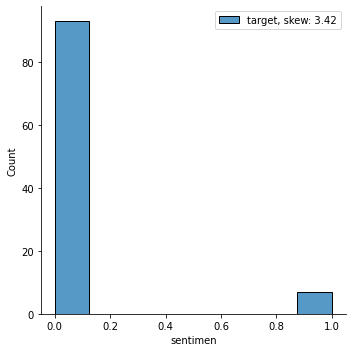

In [51]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.displot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

## Fitur Ekstraksi Menggunakan TF-IDF

### Cek Emosi 

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
vectorizer = TfidfVectorizer()

In [54]:
positive_low_reviews = df_new[(df_new["sentimen"] == 1)]
negative_low_reviews = df_new[(df_new["sentimen"] == -1)]
positive_high_reviews = df_new[(df_new["sentimen"] == 2)]
negative_high_reviews = df_new[(df_new["sentimen"] == -2)]

### Cek emosi positive low

In [55]:
positive_low_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText
2,lovely 🤍🫶 Nangis ya sambil layan lagu. Real na...,1,lovely nangis ya sambil layan lagu real nangis...,"[lovely, nangis, ya, sambil, layan, lagu, real...","[lovely, nangis, iya, sambil, layan, lagu, rea...",lovely nangis iya sambil layan lagu real nangi...,lovely nang iya layan lagu real nang masa lagu...
4,Weyh best gila @FiersaBesari !!!! Makasih bang...,1,weyh best gila user makasih bang cotjzladmmu9,"[weyh, best, gila, user, makasih, bang, cotjzl...","[weyh, best, gila, user, makasih, bang, cotjzl...",weyh best gila user makasih bang cotjzladmmu9,weyh best gila user makasih bang cotjzladmmu9
7,RT @FiersaBesari: “Aku hanya seorang pengecut ...,1,rt user aku hanya seorang pengecut sedang jatu...,"[rt, user, aku, hanya, seorang, pengecut, seda...","[rt, user, aku, hanya, seorang, pengecut, seda...",rt user aku hanya seorang pengecut sedang jatu...,rt user aku orang kecut sedang jatuh hati beri...
44,RT @FiersaBesari: “Aku hanya seorang pengecut ...,1,rt user aku hanya seorang pengecut sedang jatu...,"[rt, user, aku, hanya, seorang, pengecut, seda...","[rt, user, aku, hanya, seorang, pengecut, seda...",rt user aku hanya seorang pengecut sedang jatu...,rt user aku orang kecut sedang jatuh hati beri...
63,@acu_ct @FiersaBesari HAHAHAHAH SIAPA SURUH TA...,1,user user hahahahah siapa suruh tak pergi haha...,"[user, user, hahahahah, siapa, suruh, tak, per...","[user, user, hahahahah, siapa, suruh, tak, per...",user user hahahahah siapa suruh tak pergi haha...,user user hahahahah siapa suruh tak pergi haha...


In [56]:
Positive_1_tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
Positive_1_tf_idf = Positive_1_tf_idf_vect.fit_transform(positive_low_reviews["ProcessedText"].values)

In [57]:
Positive_1_tf_idf.shape

(7, 114)

In [58]:
!pip3 install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [60]:
features = Positive_1_tf_idf_vect.get_feature_names()

idfValues = Positive_1_tf_idf_vect.idf_

d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

for i in range(200):
    print(sortedDict[i])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


('user', 7.866468607375477)
('rt', 7.306852819440055)
('rt user', 7.306852819440055)
('user user', 7.306852819440055)
('aku', 7.019170746988274)
('aku orang', 7.019170746988274)
('barusan', 7.019170746988274)
('barusan waktu', 7.019170746988274)
('beri', 7.019170746988274)
('beri perhati', 7.019170746988274)
('bukan', 7.019170746988274)
('bukan pasti', 7.019170746988274)
('check', 7.019170746988274)
('check sound', 7.019170746988274)
('hati', 7.019170746988274)
('hati beri', 7.019170746988274)
('jatuh', 7.019170746988274)
('jatuh hati', 7.019170746988274)
('kecut', 7.019170746988274)
('kecut sedang', 7.019170746988274)
('menco', 7.019170746988274)
('orang', 7.019170746988274)
('orang kecut', 7.019170746988274)
('pasti', 7.019170746988274)
('pasti barusan', 7.019170746988274)
('perhati', 7.019170746988274)
('perhati bukan', 7.019170746988274)
('sedang', 7.019170746988274)
('sedang jatuh', 7.019170746988274)
('sound', 7.019170746988274)
('sound menco', 7.019170746988274)
('tak', 7.019170

IndexError: list index out of range

In [61]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

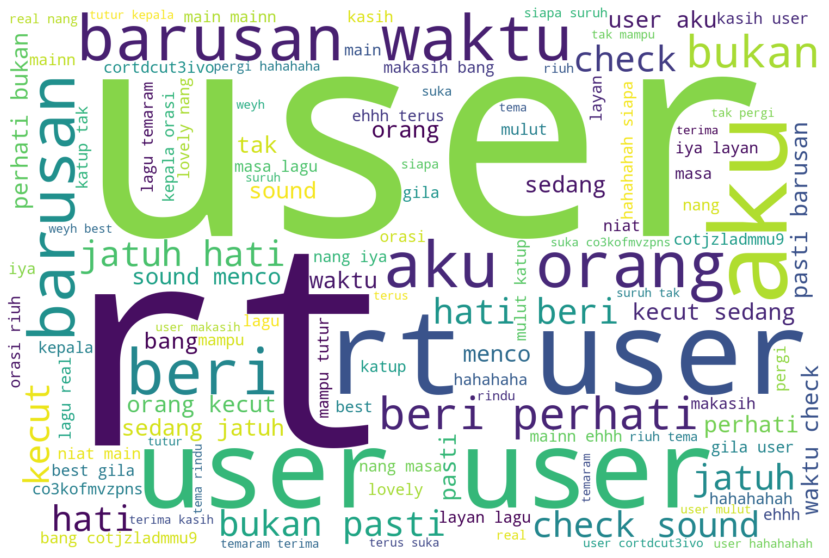

In [62]:
PlotWordCloud(d)

### Cek emosi positive high

In [63]:
positive_high_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText


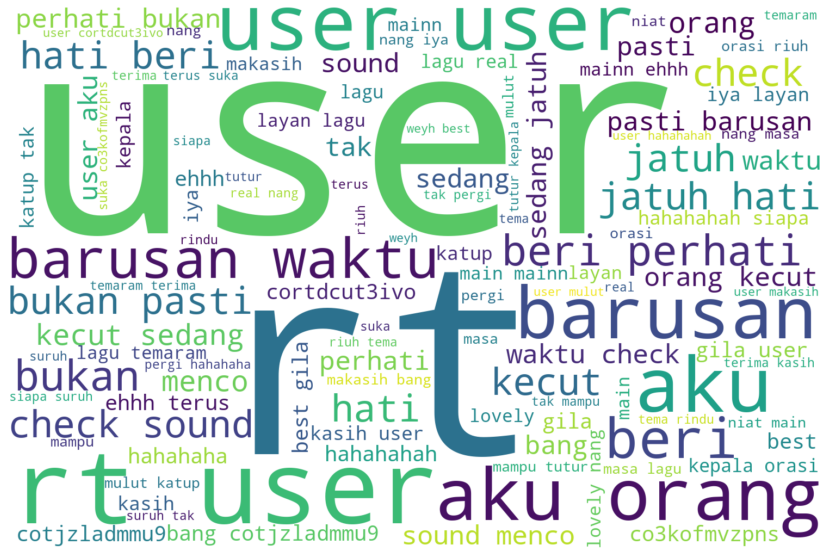

In [64]:
PlotWordCloud(d)

### Cek emosi negative low

In [65]:
negative_low_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText


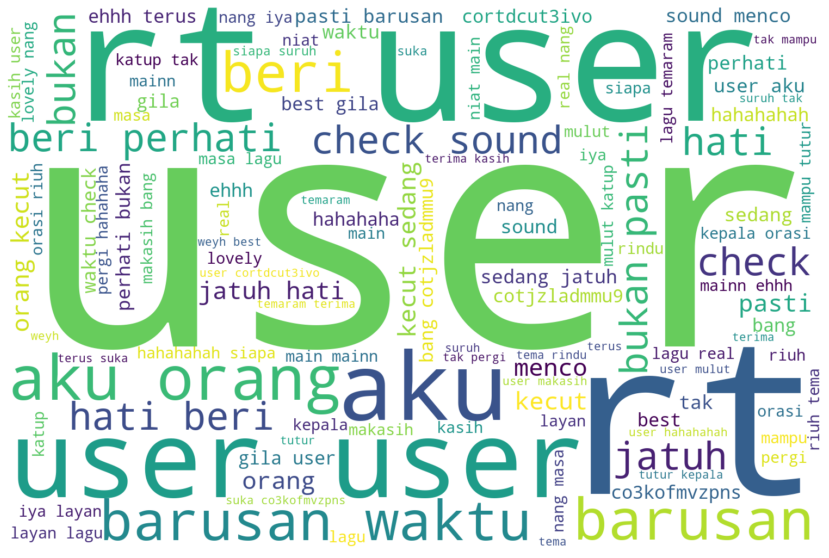

In [66]:
PlotWordCloud(d)

### Cek emosi negative high

In [67]:
negative_high_reviews.head()

,Tweet,sentimen,step01,tokens,final_tokens,step02,ProcessedText


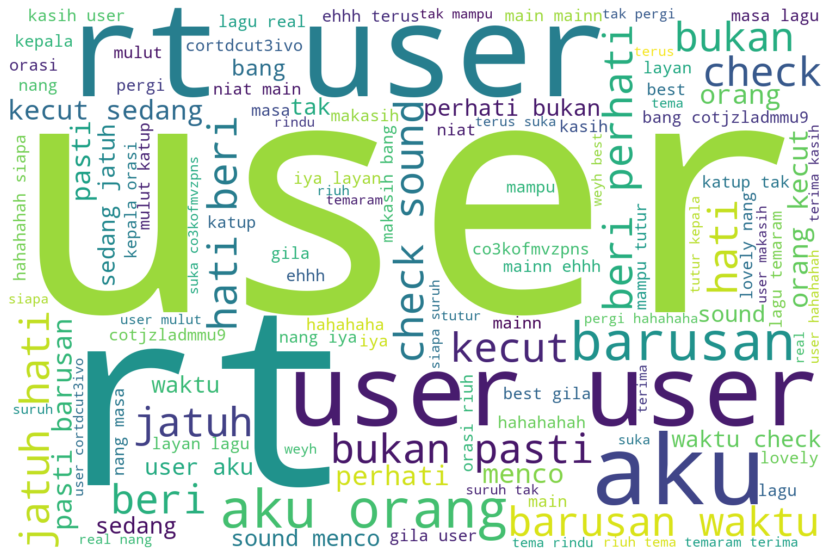

In [68]:
PlotWordCloud(d)

## Cek emosi untuk Semua label

**jangan lupa, gunakan semua data, maka yang dilakukan adalah mengolah data `df_new["sentimen"]`**

In [69]:
tfidf_vect = TfidfVectorizer(ngram_range = (1,2))

In [70]:
Data_TFIDF = tfidf_vect.fit_transform(df_new["ProcessedText"].values)

In [71]:
Data_TFIDF.shape

(100, 955)

## Training dan Testing dibagi menjadi 70 - 30

In [72]:
### Lengkapi kodenya
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [73]:
train_TFIDF, test_TFIDF, train_labels_TFIDF, test_labels_TFIDF = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

In [74]:
train_TFIDF.shape, test_TFIDF.shape, train_labels_TFIDF.shape, test_labels_TFIDF.shape

((70,), (30,), (70,), (30,))

## Model - Naive Bayes

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [76]:
parameters_nb = {
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
    'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100)
}

In [77]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [78]:
classifier_nb.fit(train_TFIDF, train_labels_TFIDF.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0.0001, 0.001, 0.1, 1, 10, 100),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [79]:
## Berapa nilai Accuracy Training set dan Test Set
y_pred_nb_train = classifier_nb.predict(train_TFIDF)
accuracy_nb_train = accuracy_score(train_labels_TFIDF, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_TFIDF)
accuracy_nb_test = accuracy_score(test_labels_TFIDF, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)


Accuracy Training set:  1.0
Accuracy Test set:  0.9333333333333333


In [80]:
## Berapa nilai Recall Training set dan Test Set
recall_nb_train = recall_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)


Recall Training set:  1.0
Recall Test set:  0.9333333333333333


In [81]:
## Berapa nilai Precision Training set dan Test Set
precision_nb_train = precision_score(train_labels_TFIDF, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_labels_TFIDF, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  1.0
Precision Test set:  0.9333333333333333


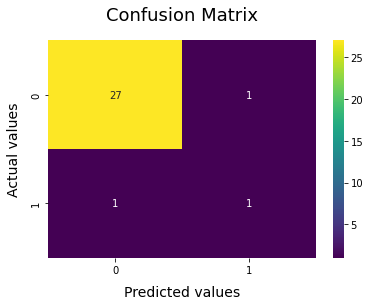

In [82]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_labels_TFIDF, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

# Visualisasi

In [83]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),                    
         ]

In [84]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,1.0,0.933333


In [85]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test),                          
                    ]

In [86]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Naive Bayes Multinomial,0.933333,0.933333,0.933333


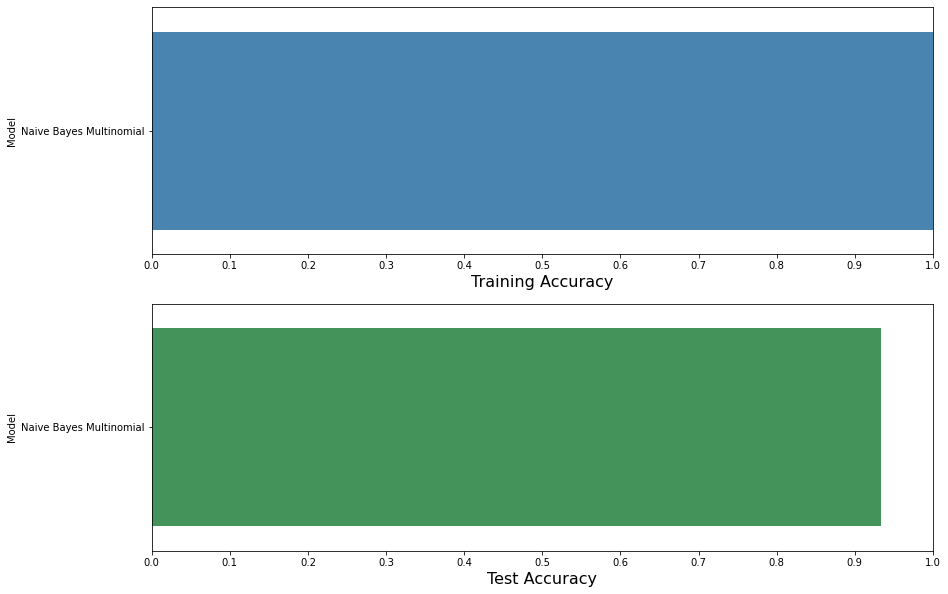

In [87]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

## Kesimpulan
Dari hasil pengujian setelah melakukan proses steming dan stopworld dapat dilihat bahwa nilai training dan testing memiliki nilai akurasi yang tinggi dimana untuk training memiliki nilai akurasi sebanyak 1.0 sedangkan testing memiliki nilai akurasi 0.93